# Generación de Grafos
William Cabrera, Paola Cortés, Simón Vélez
Universidad del Rosario 2024

In [1]:
# Librerías

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Leer el archivo CSV con la base da datos y convertirlo a un dataframe de Pandas

df = pd.read_csv(r'tcc_ceds_music100.csv')

### Grafo que relaciona géneros

Estado: Creando las aristas
Estado: Dibujando Aristas
Estado: Mostrando


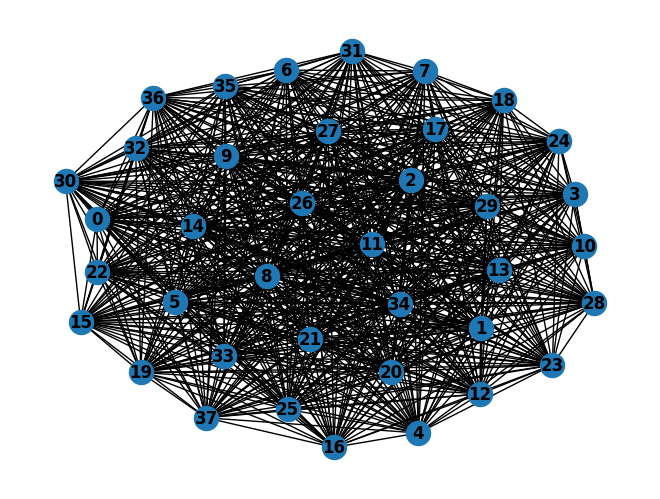

Estado: Terminado


In [3]:
# Extraer columnas relevantes
nom = df[['track_name', 'genre']].values.tolist()
top = df[['track_name', 'topic']].values.tolist()

# Crear las listas de las relaciones
relacion1 = [[i[0], i[1]] for i in nom]
relacion2 = [[i[0], i[1]] for i in top]

# Crear el grafo
gm = nx.Graph()

# Agregar nodos al grafo basados en el título de las canciones
for i in range(len(nom)):
    gm.add_node(i, label=nom[i][0])

# Diccionario para agrupar canciones por género
genre_dict = {}

for i, track in enumerate(nom):
    track_name, genre = track
    if genre not in genre_dict:
        genre_dict[genre] = []
    genre_dict[genre].append(i)

# Agregar aristas solo entre tracks del mismo género
print("Estado: Creando las aristas")
for genre, tracks in genre_dict.items():
    for i in range(len(tracks)):
        for j in range(i + 1, len(tracks)):  # Para evitar duplicación de aristas
            gm.add_edge(tracks[i], tracks[j])

# Dibujar un grafo bien bonito
pos = nx.spring_layout(gm)
print("Estado: Dibujando Aristas")
nx.draw(gm, pos, with_labels=True, font_weight='bold')
print("Estado: Mostrando")
plt.show()
print("Estado: Terminado")

### Grafo que relacionan palabras en las líricas (dos canciones están conectadas si usan la misma palabra)

In [ ]:
nombre = df[['track_name']].values.tolist()
lyrics = df[['lyrics']].values.tolist()
lyrics = [lyric[0].split(" ") for lyric in lyrics] # Separar un string con todos los lyrics en una lista de palabras
lyrics = [list(set(lyric) for lyric in lyrics)] # Eliminar palabras duplicadas

display(nombre, lyrics)



Estado: Creando las aristas
Estado: Dibujando Aristas
Estado: Mostrando


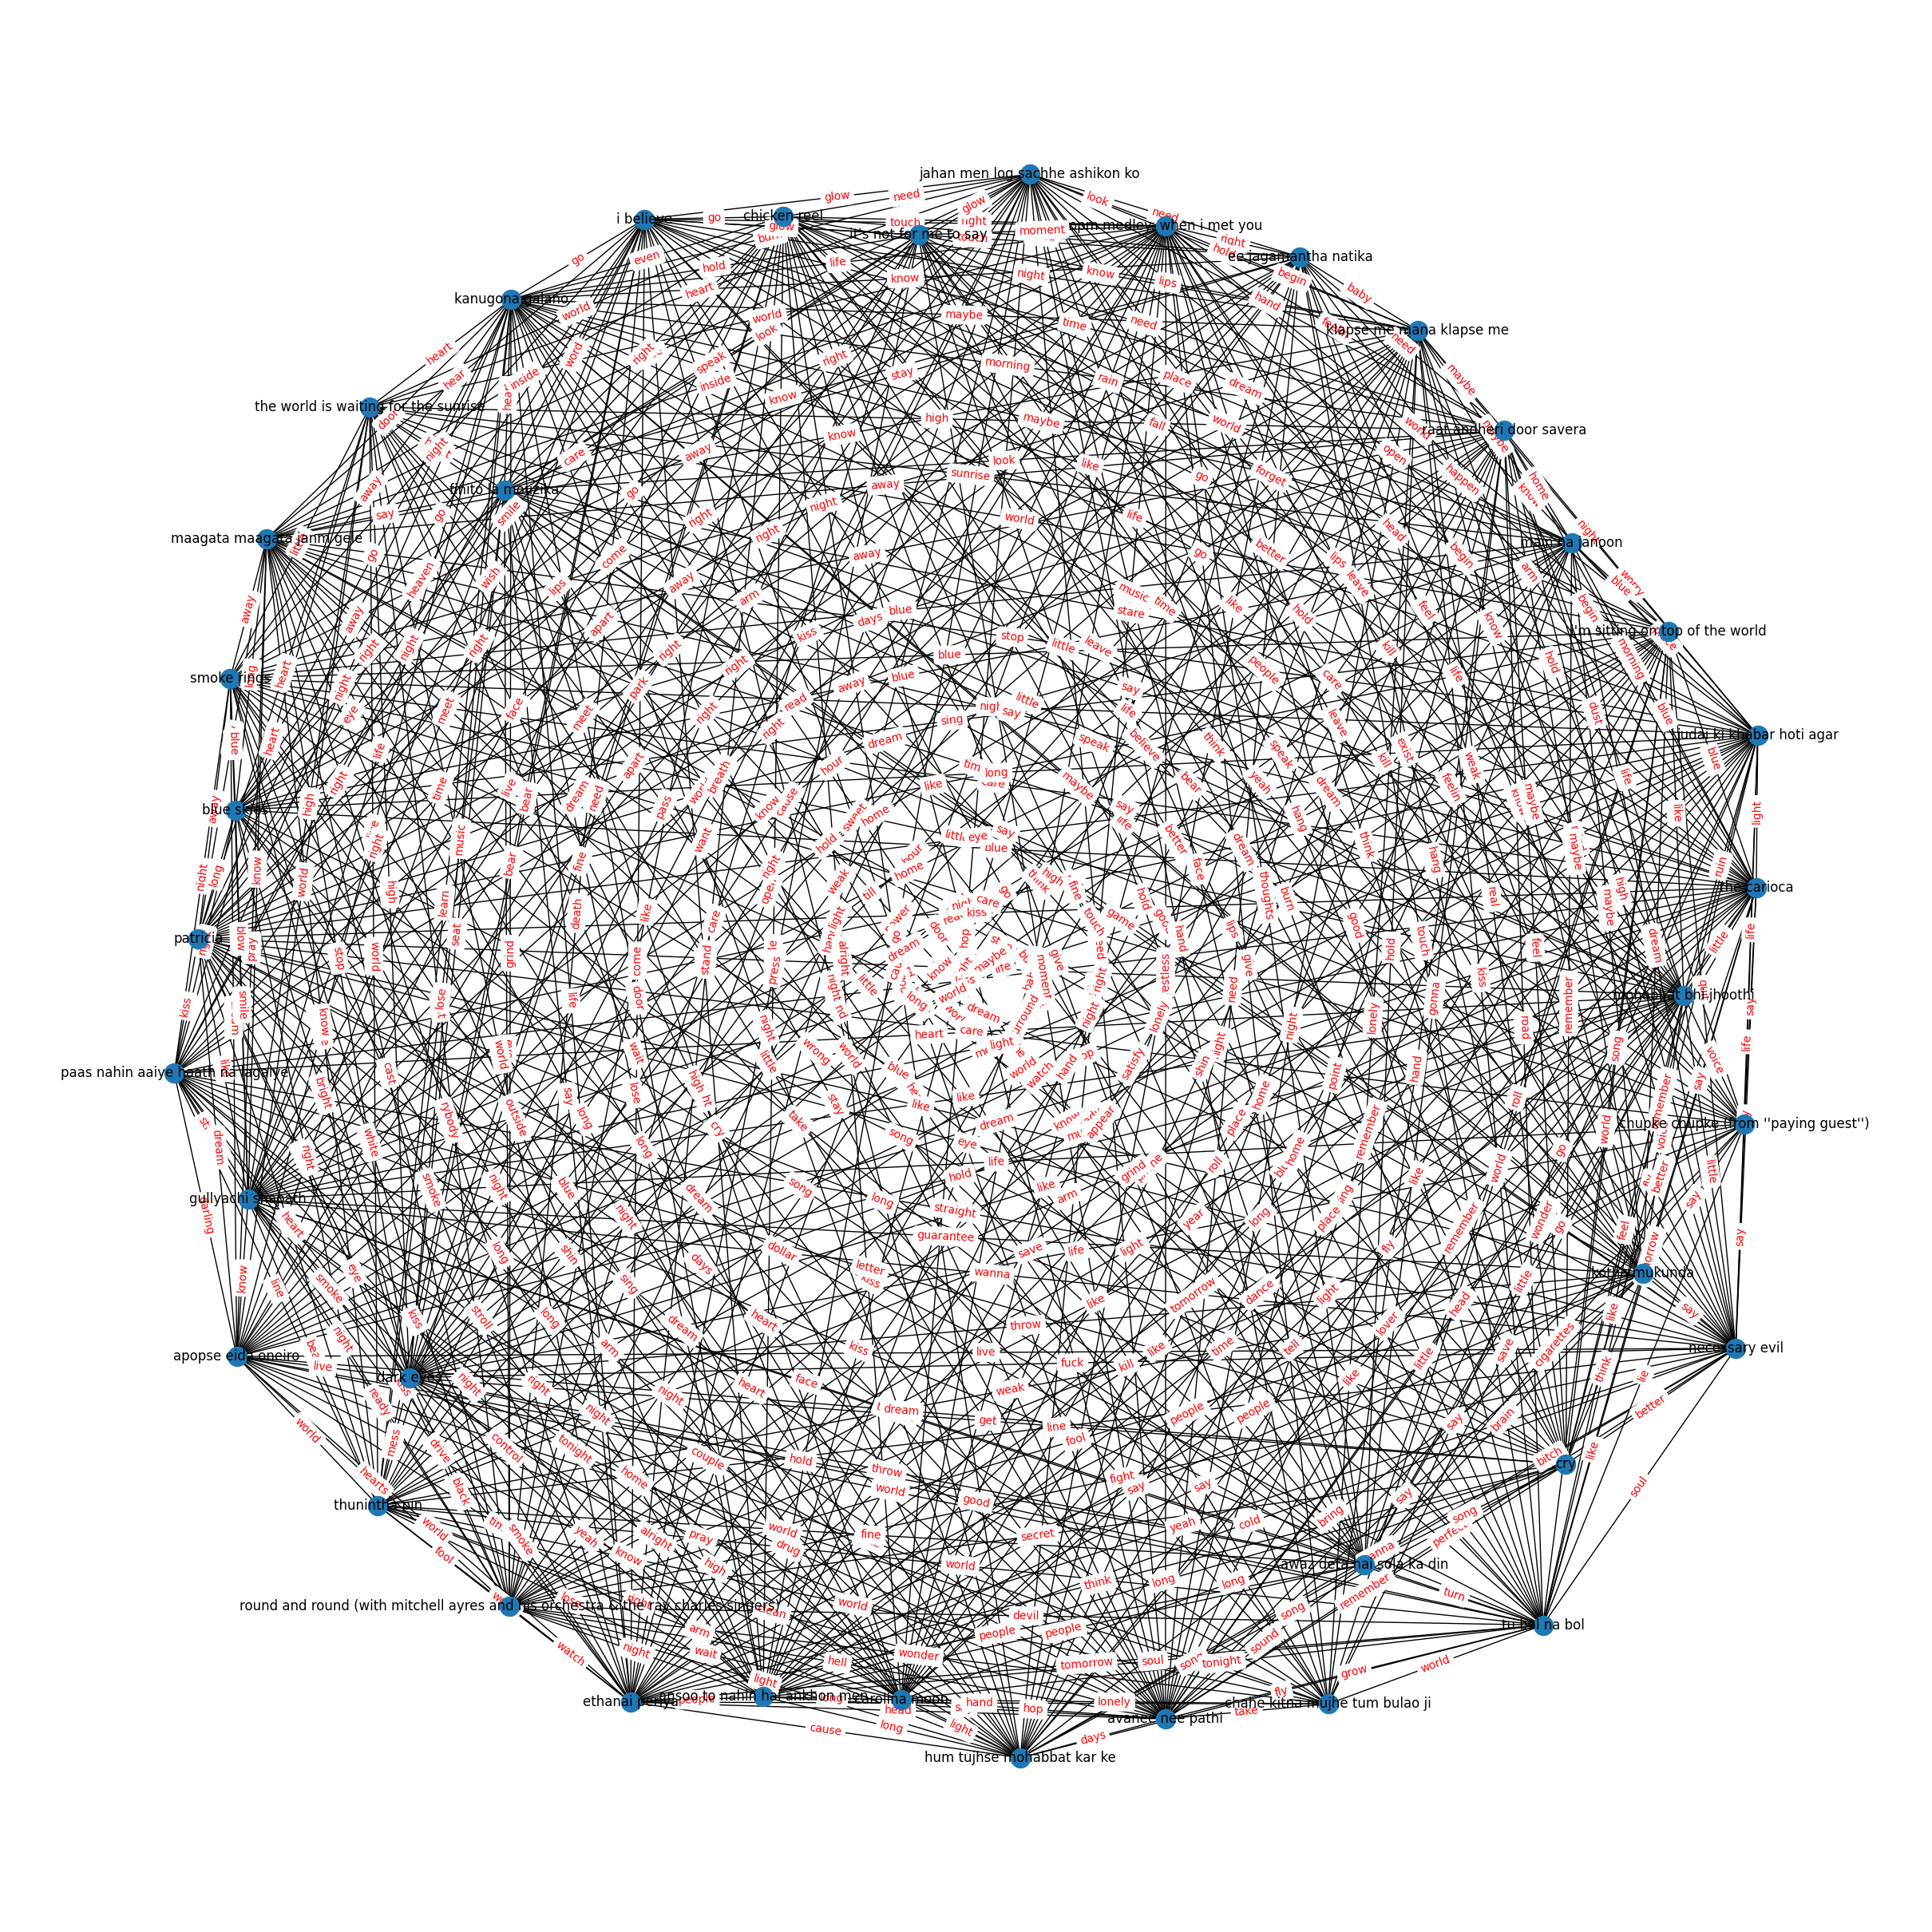

Estado: Terminado


In [28]:
# Extraer columnas relevantes y limpiar la información
nombre = df[['track_name']].values.tolist()
lyrics = df[['lyrics']].values.tolist()
lyrics = [lyric[0].split(" ") for lyric in lyrics] # Separar un string con todos los lyrics en una lista de palabras
lyrics = [list(set(lyric)) for lyric in lyrics] # Eliminar palabras duplicadas

# Crear el grafo
gm = nx.Graph()

# Agregar nodos al grafo basados en el título de las canciones
for i in range(len(nombre)):
    gm.add_node(i, label=nombre[i])

# Crear un diccionario de etiquetas de nodos para usarlo al dibujar el grafo
node_labels = {i: nombre[i][0] for i in range(len(nombre))}

# Diccionario para etiquetar aristas con las palabras que conectan las canciones
edge_labels = {}

# Diccionario para agrupar canciones por palabras
palabras_dict = {}

# Llenar el diccionario con palabras como claves y listas de canciones como valores
for i, lyric in enumerate(lyrics):
    for palabra in lyric:
        if palabra not in palabras_dict:
            palabras_dict[palabra] = []
        palabras_dict[palabra].append(i)

# Agregar aristas entre canciones que tienen palabras en común
print("Estado: Creando las aristas")
for palabra, canciones in palabras_dict.items():
    for i in range(len(canciones)):
        for j in range(i + 1, len(canciones)):  # Para evitar duplicación de aristas
            gm.add_edge(canciones[i], canciones[j])
            edge_labels[(canciones[i], canciones[j])] = palabra # Guardar la palabra asociada con cada arista

# Ajustar el tamaño de la figura para que no quede muy apretada
plt.figure(figsize=(24, 24))

# Dibujar el grafo bien bonito 
pos = nx.spring_layout(gm, k = 10) # k controla la distancia entre nodos
print("Estado: Dibujando Aristas")
nx.draw(gm, pos, labels=node_labels, with_labels=True) # Dibujar los vértices con el nombre de la canción como etiqueta
nx.draw_networkx_edge_labels(gm, pos, edge_labels=edge_labels, font_color='red') # Etiquetar las aristas con la palabra que relaciona ambas canciones
print("Estado: Mostrando")
plt.show()
print("Estado: Terminado")